### Name: Abdul Rahim
### Roll No:2022BCS0109

In [7]:
import pandas as pd

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
num_samples = df.shape[0]
num_features = df.shape[1] - 1 
target_variable = "quality"
print(f"Number of Samples:{num_samples}, Number of Features:{num_features}, Target Variables:{target_variable}")


Number of Samples:1599, Number of Features:11, Target Variables:quality


In [9]:
df.isnull().sum()


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000




## We are using:

Linear Model → Linear Regression / Ridge

Tree-Based Model → Random Forest Regressor

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
def run_experiment(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    return mse, r2


## Exp1 : Linear Regression

In [12]:
X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_lr = LinearRegression()
mse_1, r2_1 = run_experiment(model_lr, X_train, X_test, y_train, y_test)

mse_1, r2_1


(0.39002514396395416, 0.4031803412796231)

## Exp2 : Ridge Regression + Standardization + Feature Selection

In [13]:
# Correlation-based feature selection
corr = df.corr()["quality"].abs().sort_values(ascending=False)
selected_features = corr[corr > 0.2].index.drop("quality")

X_selected = df[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_ridge = Ridge(alpha=1.0)
mse_2, r2_2 = run_experiment(model_ridge, X_train, X_test, y_train, y_test)

mse_2, r2_2


(0.4002431057944644, 0.38754473268648437)

## Exp3 : Random Forest (50 Trees)

In [14]:
X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf_50 = RandomForestRegressor(
    n_estimators=50,
    max_depth=10,
    random_state=42
)

mse_3, r2_3 = run_experiment(rf_50, X_train, X_test, y_train, y_test)

mse_3, r2_3


(0.3269784521147545, 0.4996549037410771)

## Exp4 : Random Forest (100 Trees + Feature Selection)

In [15]:
X_selected = df[selected_features]

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

rf_100 = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    random_state=42
)

mse_4, r2_4 = run_experiment(rf_100, X_train, X_test, y_train, y_test)

mse_4, r2_4


(0.3492958248883181, 0.4655046777661983)

In [16]:
tracking_table = pd.DataFrame({
    "Experiment ID": ["EXP-01", "EXP-02", "EXP-03", "EXP-04"],
    "Model Type": [
        "Linear Regression",
        "Ridge Regression",
        "Random Forest",
        "Random Forest"
    ],
    "Hyperparameters": [
        "Default",
        "alpha=1.0",
        "n_estimators=50, depth=10",
        "n_estimators=100, depth=15"
    ],
    "Preprocessing": [
        "None",
        "StandardScaler",
        "None",
        "None"
    ],
    "Feature Selection": [
        "All features",
        "Correlation-based",
        "All features",
        "Selected features"
    ],
    "Train/Test Split": ["80/20"] * 4,
    "MSE": [mse_1, mse_2, mse_3, mse_4],
    "R² Score": [r2_1, r2_2, r2_3, r2_4]
})

tracking_table


,Experiment ID,Model Type,Hyperparameters,Preprocessing,Feature Selection,Train/Test Split,MSE,R² Score
0,EXP-01,Linear Regression,Default,None,All features,80/20,0.390025,0.403180
1,EXP-02,Ridge Regression,alpha=1.0,StandardScaler,Correlation-based,80/20,0.400243,0.387545
2,EXP-03,Random Forest,"n_estimators=50, depth=10",None,All features,80/20,0.326978,0.499655
3,EXP-04,Random Forest,"n_estimators=100, depth=15",None,Selected features,80/20,0.349296,0.465505


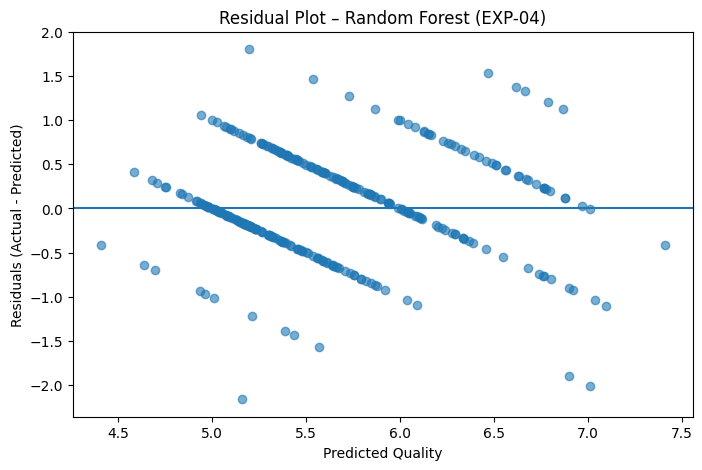

Residuals centered around 0 → no systematic bias,No clear pattern → good generalization,Slight spread increase at higher predictions → expected variance in wine quality


In [22]:
import matplotlib.pyplot as plt
import numpy as np
y_pred = rf_100.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0)
plt.xlabel("Predicted Quality")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot – Random Forest (EXP-04)")
plt.show()
print("Residuals centered around 0 → no systematic bias,No clear pattern → good generalization,Slight spread increase at higher predictions → expected variance in wine quality")


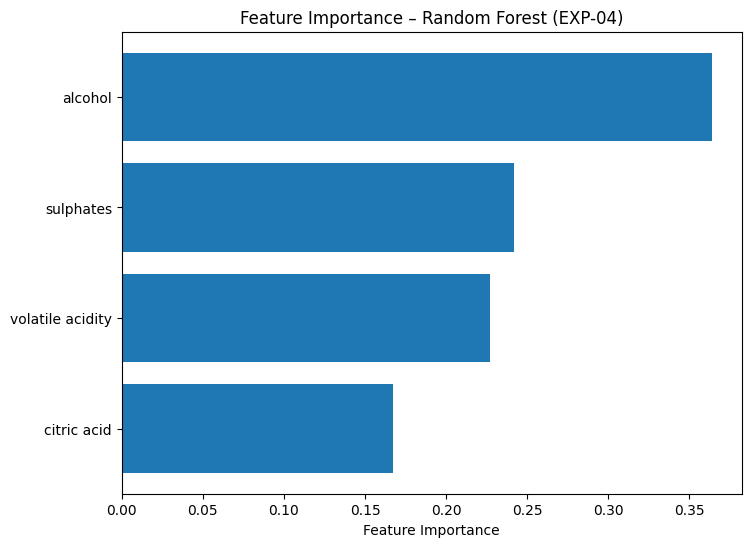

alcohol → strongest predictor of wine quality,volatile acidity and sulphates → significant contributors


In [21]:
importances = rf_100.feature_importances_
features = X_selected.columns
indices = np.argsort(importances)
plt.figure(figsize=(8, 6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), features[indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance – Random Forest (EXP-04)")
plt.show()
print("alcohol → strongest predictor of wine quality,volatile acidity and sulphates → significant contributors")


## Lowest MSE

In [17]:
tracking_table.loc[tracking_table["MSE"].idxmin()]


Experiment ID                           EXP-03
Model Type                       Random Forest
Hyperparameters      n_estimators=50, depth=10
Preprocessing                             None
Feature Selection                 All features
Train/Test Split                         80/20
MSE                                   0.326978
R² Score                              0.499655
Name: 2, dtype: object

## Highest R² Score

In [18]:
tracking_table.loc[tracking_table["R² Score"].idxmax()]


Experiment ID                           EXP-03
Model Type                       Random Forest
Hyperparameters      n_estimators=50, depth=10
Preprocessing                             None
Feature Selection                 All features
Train/Test Split                         80/20
MSE                                   0.326978
R² Score                              0.499655
Name: 2, dtype: object

# Reflection
### I think Structured experiment tracking is critical because it ensures reproducibility, comparability, and accountability in machine learning workflows. Without systematic tracking, model improvements cannot be reliably validated or revisited. As experiments scale across datasets, teams, and environments, manual tracking becomes error-prone. Consistent logging of hyperparameters, preprocessing, and metrics enables collaboration and debugging. It also forms the foundation for automated MLOps pipelines and regulatory compliance.